## Artificial Intelligence Mathmatical Foundation 

> 2019-09-22

## we need to get the area of $f(x) = 2 x^ 2 + 3x + 4$

In [1]:
%matplotlib inline

In [14]:
def square(x): return 2 * x ** 2 + 3 * x + 4

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [9]:
X = np.linspace(-10, 10, 1000)

In [15]:
Y = [square(x) for x in X]

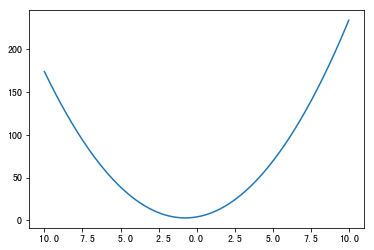

In [16]:
plt.plot(X, Y)

In [19]:
def get_the_area_apporaximate(f, Xs):
    area = 0
    
    for i, x in enumerate(Xs[:-1]):
        next_x = Xs[i+1]
        delta_x = next_x - x
        sub_area = ((f(next_x) + f(x)) * delta_x) / 2
        
        area += sub_area
    
    return area

In [20]:
get_the_area_apporaximate(square, np.linspace(-10, 10, 100))

1413.6054144134953

In [21]:
get_the_area_apporaximate(square, np.linspace(-10, 10, 1000))

1413.336005341344

In [22]:
get_the_area_apporaximate(square, np.linspace(-10, 10, 2000))

1413.3340006671654

In [23]:
get_the_area_apporaximate(square, np.linspace(-10, 10, 4000))

1413.3335000833627

In [30]:
get_the_area_apporaximate(square, np.linspace(-10, 10, 10000))

1413.3333600053313

# 收敛

## 一小块小块的东西加起来的过程 就叫做：积分运算

# 牛顿莱布尼兹定律：F(b) - F(a)

In [31]:
def square(x): return 2 * x ** 2 + 3 * x + 4

def F(x): return 2 / 3 * (x ** 3) + 3/2 * x ** 2 + 4 * x 

In [27]:
F(10)

856.6666666666666

In [28]:
F(-10)

-556.6666666666666

In [29]:
F(10) - F(-10)

1413.3333333333333

## 线性代数

In [32]:
points = [
    (0, 0), 
    (0.5, 0), 
    (0.5, 6.44),
    (6, 0),
    (6, 8),
    (5.5, 8),
    (5.5, 1.58),
    (0, 8)
]

In [33]:
def draw_segment(segments):
    for i, seg in enumerate(segments):
        _next = segments[(i + 1) % len(segments)]
        x1, y1 = seg
        x2, y2 = _next
        plt.plot([x1, x2], [y1, y2])

## 我们画了一个英文数字“N”

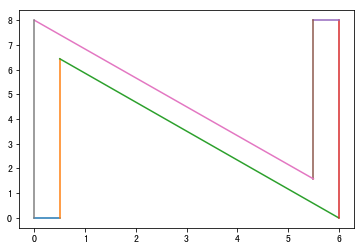

In [34]:
draw_segment(points)

In [35]:
import numpy as np

In [36]:
points_matrix = np.array(points)

In [47]:
matrix = np.array([
    [1, 0.4],
    [-0.4, 1],
])

In [45]:
points_matrix

array([[0.  , 0.  ],
       [0.5 , 0.  ],
       [0.5 , 6.44],
       [6.  , 0.  ],
       [6.  , 8.  ],
       [5.5 , 8.  ],
       [5.5 , 1.58],
       [0.  , 8.  ]])

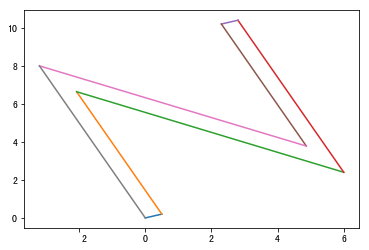

In [48]:
draw_segment(np.dot(points_matrix, matrix))

## Probability

In [49]:
import random

In [50]:
def dice():
    return random.randint(1, 6)

In [51]:
dice()

3

In [54]:
occurences = [
    (first, second) for first in range(1, 6+1) for second in range(1, 6 + 1)
]

In [55]:
occurences

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6)]

## 至少有一次是3的概率是多少？ 

## Probability of the *Events* = $ \frac{count(events)}{count(all-events)} $

In [56]:
def probability(events, all_events):
    return len(set(events)) / len(set(all_events))

In [60]:
probability([(a, b) for a, b in occurences if a == 3 or b == 3], occurences)

0.3055555555555556

# Conditional Probability: 如果第一次是1， 第二次是3的概率是多少

In [61]:
first_is_one_second_is_3 = [
    (a, b) for a, b in occurences if a == 1 and b == 3
]

In [63]:
probability(first_is_one_second_is_3, occurences)

0.027777777777777776

## 中心极限定律

只要你重复的实验次数足够多，那么，值的平均值，它就满足一个“高斯分布”（正太分布）

In [64]:
%matplotlib inline 
import matplotlib.pyplot as plt
from statistics import mean
from random import normalvariate, triangular, choice, vonmisesvariate, uniform

def normal(mu=0, sigma=1): return random.normalvariate(mu, sigma)

def repeated_hist(dist, n=10**6, bins=100):
    "Sample the distribution n times and make a histogram of the results."
    samples = [dist() for _ in range(n)]
    plt.hist(samples, bins=bins, normed=True)
    plt.title('{} (μ = {:.1f})'.format(dist.__name__, mean(samples)))
    plt.grid(axis='x')
    plt.yticks([], '')
    plt.show()

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


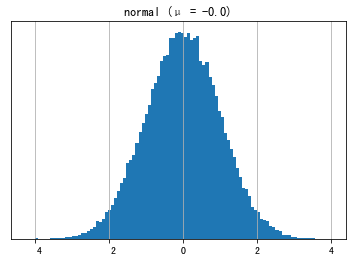

In [75]:
repeated_hist(normal, n=50000)

In [82]:
def sum10dice(): return sum(random.randint(1, 6) / 10 for _ in range(10))

In [96]:
sum10dice()

4.3

## 并不是一件正太分布的事情，1, 6 

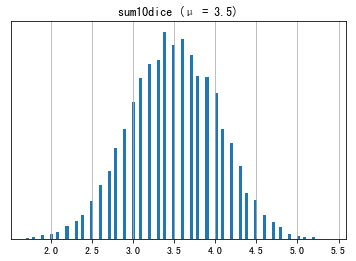

In [104]:
repeated_hist(sum10dice, 10000)

## WX + B -> W: 正太分布

## 贝叶斯概率: 明天晚上再讲， 图论；
## 其实
## 基本的机器学习模型了~ 